
PROBLEM:
Wypełnij kalendarz zmian, minimalizując wartość wypłaty

**Zadanie polegało na przypisaniu pracowników do każdego dnia, tak aby nikt pracował więcej niż trzy dni i aby koszt na pracowników był minimalny. Poniższa ilustracjia pokazuje warunki które należało spełnić.**


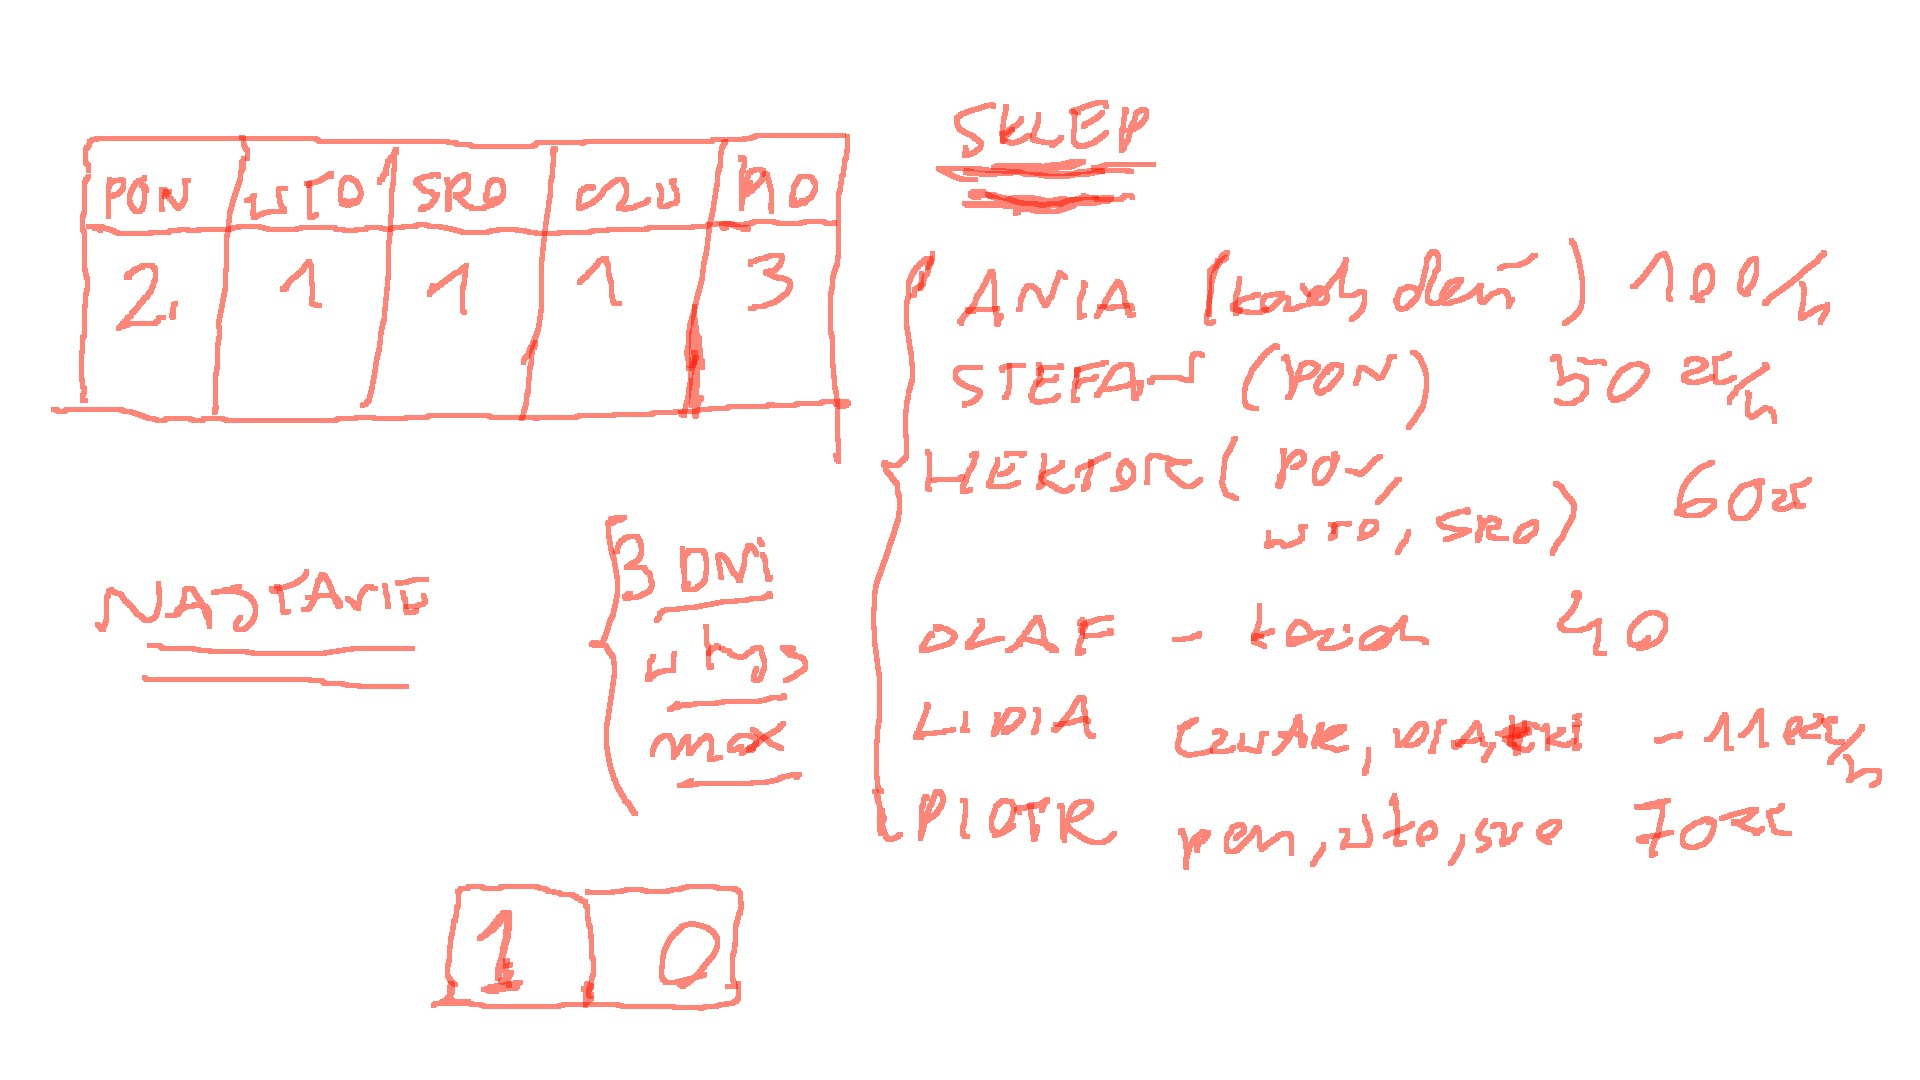

**Kroki analizowania problemu**
1. Identyfikacja zmiennych decyzyjnych

2. Określenie funkcji celu

3. Określenie ograniczeń

4. Rozwiązanie problemu

#-Zmienne decyzyjne

kto kiedy jest dostępny

LpVariable.dicts("vars",(pracownicy.keys(), dni),lowBound=0,upBound=1,cat='Integer')

#-Funkcja celu

minimalizacja wypłaty

lpSum(pracownicy[pracownik]["stawka"]•lpSum(vars[pracownik][dzien] for dzien in dni) for pracownik in pracownicy)

#-Ograniczenia

pracownik może pracować min raz w tyg oraz max 3 razy w tyg
for pracownik in pracownicy:  prob += lpSum(vars[pracownik][dzien] for dzien in dni) <= 3  prob += lpSum(vars[pracownik][dzien] for dzien in dni) >= 1

pracownik może pracować tylko w dzień kiedy kiedy jest dostępny
for pracownik in pracownicy: temp = 0  for dzien in dni:    if dzien not in pracownicy[pracownik]["dostepnosc"]:          temp += vars[pracownik][dzien]  prob += temp == 0

zapotrzebowanie osób w konkretne dni tygodnia
for dzien in dni: prob += lpSum(vars[pracownik][dzien] for pracownik in pracownicy) >= liczba_osob[dzien]

Program po rozwiązaniu zwróca najbardziej optymalną kombinację.

In [1]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 104kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

In [2]:
from pulp import *
import pandas as pd

pracownicy = ["Ania","Stefan","Hektor","Olaf","Lidia","Piotr"]
stawka = [100,50,60,40,110,70]
dni = ["Pon","Wt","Sr","Czw","Pia"]
pracownikowNaZmiane = [2,1,1,1,3]
dlugoscZmiany=8
temp = [] # lista przeznaczona do sumowania elementów
pracownicyZDniami = []
niedostepny = [[],[1,2,3,4],[3,4],[],[0,1,2],[3,4]]

prob = LpProblem("Sklep", LpMinimize)

for pracownik in pracownicy:
    pracownik = [LpVariable(pracownik+"_{}".format(dzien), cat = "Binary") for dzien in dni]
    pracownicyZDniami.append(pracownik)
 
prob += sum((dlugoscZmiany*(cena*(sum(x))) for x,cena in zip(pracownicyZDniami,stawka)))

for numer,pracownik in enumerate(pracownicyZDniami):
    for nie_moze in niedostepny[numer]:
        temp.append(pracownik[nie_moze])
    suma = sum(temp)
    prob += suma == 0 
    temp.clear()

for dzien in range(len(dni)):
    for pracownik in range(len(pracownicy)):
        temp.append(pracownicyZDniami[pracownik][dzien])
    suma = sum(temp)
    prob += suma == pracownikowNaZmiane[dzien]
    temp.clear()

for pracownik in pracownicyZDniami:
    prob += sum(pracownik) <= 3


#print(prob)
prob.writeLP("Scheduling_Problem")
prob.solve()
print ("Status:", LpStatus[prob.status])
for v in prob.variables():
    if(v.varValue == 1):
        print (v.name, "=", v.varValue)
print("Minimalny koszt = ", value(prob.objective))

Status: Optimal
Ania_Pia = 1.0
Hektor_Pon = 1.0
Hektor_Sr = 1.0
Lidia_Pia = 1.0
Olaf_Czw = 1.0
Olaf_Pia = 1.0
Olaf_Wt = 1.0
Stefan_Pon = 1.0
Minimalny koszt =  4000.0
